# Etsy Project 

by Jason Alexander Besly, Keith Singleton, Paul Williams, Patricia Stone

Divergence Academy Data Science Immersive Program - 1st Cohort

https://divergence.academy/datascience

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [162]:
dat = pd.read_csv('../data/etsy.csv')

In [163]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11919 entries, 0 to 11918
Data columns (total 82 columns):
idListingURL                                  11919 non-null int64
idOrig                                        11919 non-null int64
idListing                                     11919 non-null int64
idShop                                        11919 non-null int64
list1_products_shopLink                       11876 non-null object
list1_products_name_001_LP                    11919 non-null object
list1_products_url_002_LP                     11919 non-null object
list1_products_shopName_003_LP                11919 non-null object
list1_products_price_004_LP                   11898 non-null float64
list1_products_ads_005_LP                     11919 non-null object
list1_products_pageNum_006_LP                 11919 non-null int64
list1_products_categories_007_LP              11919 non-null object
list1_products_searchTerms_008_LP             11919 non-null object
list1_produ

In [164]:
dat.head()

,idListingURL,idOrig,idListing,idShop,list1_products_shopLink,list1_products_name_001_LP,list1_products_url_002_LP,list1_products_shopName_003_LP,list1_products_price_004_LP,list1_products_ads_005_LP,...,products_medianFeaturedItemsPrice_x11x,products_shopAnnouncementLength_x12x,products_numShopCategories_x13x,products_aboutTitleLength_x14x,products_aboutDescLength_x15x,products_shopPolicyWelcomeLength_x16x,products_paymentLength_x17x,products_shippingLength_x18x,products_refundAndExchangesLength_x19x,products_addPolicyFAQsLength_x20x
0,11024,13043,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
1,3381,4004,2639,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,All-in-One Jewelry Rack - Wooden Wall Hanging ...,https://www.etsy.com/listing/222940654/all-in-...,TheWoodenCorner,132.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
2,511,607,416,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Organizer - Wooden Wall Hanging Jewelr...,https://www.etsy.com/listing/250564139/jewelry...,TheWoodenCorner,188.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
3,10625,12567,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
4,10589,12521,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN


In [165]:
dat.columns

Index([u'idListingURL', u'idOrig', u'idListing', u'idShop',
       u'list1_products_shopLink', u'list1_products_name_001_LP',
       u'list1_products_url_002_LP', u'list1_products_shopName_003_LP',
       u'list1_products_price_004_LP', u'list1_products_ads_005_LP',
       u'list1_products_pageNum_006_LP', u'list1_products_categories_007_LP',
       u'list1_products_searchTerms_008_LP',
       u'list1_products_numResults_009_LP', u'list1_products_sortBy_010_LP',
       u'list1_products_recommendedShops_011_LP',
       u'list1_products_relatedTerms_012_LP',
       u'list1_products_listedDate_013_DPA',
       u'list1_products_numViews_014_DPA', u'list1_products_numFavs_015_DPA',
       u'list1_products_facebookLike_016_DP', u'list1_products_options_017_DP',
       u'list1_products_overview_018_DPA',
       u'list1_products_etsyGiftCard_019_DPA',
       u'list1_products_customOrder_020_DP',
       u'list1_products_mainImage_021_DPA', u'list1_products_numPics_022_DPA',
       u'list1_produ

# We filtered the product locations to get the value counts of how many come from China

In [166]:
# We filtered the product locations to get the value counts of how many come from China
dat['list1_products_location_029_SP'].str.contains("China").value_counts()


False    10618
True        25
Name: list1_products_location_029_SP, dtype: int64

In [167]:
#Renaming the Columns
dat = dat.rename(columns={'list1_products_ads_005_LP': 'ads', 'list1_products_location_029_SP': 'product_location', 'list1_products_price_004_LP': 'product_price', 'list1_products_numSales_030_SP': 'product_numSales', 'list1_products_onEtsySince_031_SP': 'onEtsySince'})

In [168]:
#Assigning x1 and x2
dat['China'] = (pd.get_dummies(dat['product_location'].str.contains("China"), drop_first=True)) # x2
dat['IPO'] = (pd.get_dummies((dat['onEtsySince'] >=2015), drop_first = True))  # x1

In [169]:
dat.head()

,idListingURL,idOrig,idListing,idShop,list1_products_shopLink,list1_products_name_001_LP,list1_products_url_002_LP,list1_products_shopName_003_LP,product_price,ads,...,products_numShopCategories_x13x,products_aboutTitleLength_x14x,products_aboutDescLength_x15x,products_shopPolicyWelcomeLength_x16x,products_paymentLength_x17x,products_shippingLength_x18x,products_refundAndExchangesLength_x19x,products_addPolicyFAQsLength_x20x,China,IPO
0,11024,13043,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN,0,0
1,3381,4004,2639,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,All-in-One Jewelry Rack - Wooden Wall Hanging ...,https://www.etsy.com/listing/222940654/all-in-...,TheWoodenCorner,132.0,notAd,...,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN,0,0
2,511,607,416,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Organizer - Wooden Wall Hanging Jewelr...,https://www.etsy.com/listing/250564139/jewelry...,TheWoodenCorner,188.0,notAd,...,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN,0,0
3,10625,12567,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN,0,0
4,10589,12521,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN,0,0


In [170]:
#We subsetted facebook likes out of the data frame by grouping by shopID first and then we calculated the mean.
# x1 dataframe complete
fblikes_by_shop = dat.groupby('idShop')['list1_products_facebookLike_016_DP'].mean()
fblikes_by_shop.fillna(value=0, method=None, axis=None, inplace=True, limit=None, downcast=None)
pd.DataFrame(fblikes_by_shop)



,list1_products_facebookLike_016_DP
idShop,
2,0.000000
3,0.000000
5,41.500000
6,0.666667
7,6.266667
8,0.400000
9,3.666667
10,0.000000
11,1.500000


In [171]:
# y  variable dataframe
grouped = dat[['idShop','product_price', 'product_numSales']].groupby('idShop')
X= grouped[['product_price', 'product_numSales']].agg({'product_price':'median', 'product_numSales':'count'})
X['revenue'] = X.product_price * X.product_numSales

In [172]:

X.head()

,product_numSales,product_price,revenue
idShop,,,
2,1,4.99,4.99
3,1,14.00,14.00
5,0,11.50,0.00
6,0,25.00,0.00
7,0,60.00,0.00


In [173]:
datdem3 = dat.merge(X, left_index=True, right_index=True)

In [196]:
datdem3 = datdem3.merge(pd.DataFrame(fblikes_by_shop), left_index=True, right_index=True)

In [204]:
datdem3.columns

Index([u'idListingURL', u'idOrig', u'idListing', u'idShop',
       u'list1_products_shopLink', u'list1_products_name_001_LP',
       u'list1_products_url_002_LP', u'list1_products_shopName_003_LP',
       u'product_price_x', u'ads', u'list1_products_pageNum_006_LP',
       u'list1_products_categories_007_LP',
       u'list1_products_searchTerms_008_LP',
       u'list1_products_numResults_009_LP', u'list1_products_sortBy_010_LP',
       u'list1_products_recommendedShops_011_LP',
       u'list1_products_relatedTerms_012_LP',
       u'list1_products_listedDate_013_DPA',
       u'list1_products_numViews_014_DPA', u'list1_products_numFavs_015_DPA',
       u'list1_products_facebookLike_016_DP_x',
       u'list1_products_options_017_DP', u'list1_products_overview_018_DPA',
       u'list1_products_etsyGiftCard_019_DPA',
       u'list1_products_customOrder_020_DP',
       u'list1_products_mainImage_021_DPA', u'list1_products_numPics_022_DPA',
       u'list1_products_productDesc_023_DPA',
      

#  Models

In [180]:
mod1 = smf.ols('revenue ~ China', data=datdem3)

In [181]:
fitted = mod1.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6588
Date:                Fri, 22 Sep 2017   Prob (F-statistic):              0.417
Time:                        20:59:13   Log-Likelihood:                -24190.
No. Observations:                3622   AIC:                         4.838e+04
Df Residuals:                    3620   BIC:                         4.840e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.3661      3.202     18.538      0.000      53.087      65.645
China        -52.1439     64.244     -0.812      0.417    -178.102      73.814
==============================================================================
Omnibus:                     6899.271   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17944955.279
Skew:                          14.351   Prob(JB):                         0.00
Kurtosis:                     346.631   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
mod2 = smf.ols('revenue ~ China + IPO', data=datdem3)

In [187]:
fitted = mod2.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3742
Date:                Fri, 22 Sep 2017   Prob (F-statistic):              0.688
Time:                        21:07:56   Log-Likelihood:                -24190.
No. Observations:                3622   AIC:                         4.839e+04
Df Residuals:                    3619   BIC:                         4.841e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.8764      3.628     16.505      0.000      52.764      66.989
China        -52.6542     64.275     -0.819      0.413    -178.672      73.364
IPO           -2.3134      7.724     -0.299      0.765     -17.458      12.831
==============================================================================
Omnibus:                     6898.630   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17934153.846
Skew:                          14.348   Prob(JB):                         0.00
Kurtosis:                     346.528   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
mod3 = smf.ols('revenue ~ China + IPO + list1_products_facebookLike_016_DP_y', data=datdem3)

In [208]:
fitted = mod3.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4615
Date:                Fri, 22 Sep 2017   Prob (F-statistic):              0.709
Time:                        21:26:30   Log-Likelihood:                -24190.
No. Observations:                3622   AIC:                         4.839e+04
Df Residuals:                    3618   BIC:                         4.841e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               59.4880      3.661     16.251      0.000      52.311      66.665
China                                  -52.3928     64.279     -0.815      0.415    -178.419      73.633
IPO                                     -2.3060      7.725     -0.299      0.765     -17.451      12.839
list1_products_facebookLike_016_DP_y     0.1838      0.230      0.798      0.425      -0.268       0.635
==============================================================================
Omnibus:                     6899.339   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17946690.470
Skew:                          14.351   Prob(JB):                         0.00
Kurtosis:                     346.648   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visual Models

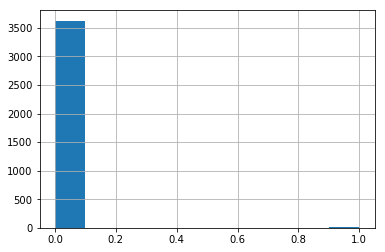

In [209]:
datdem3.China.hist();

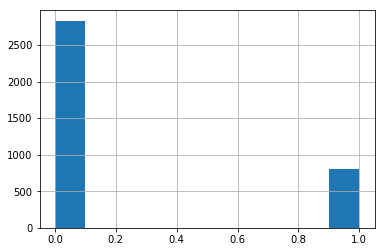

In [210]:
datdem3.IPO.hist();

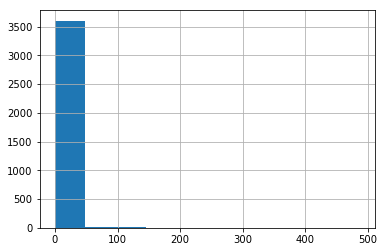

In [211]:
datdem3.list1_products_facebookLike_016_DP_y.hist();

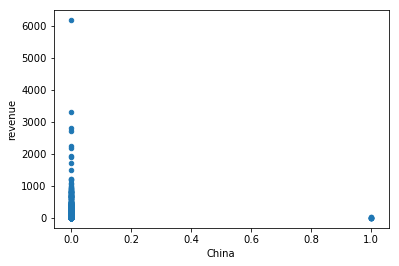

In [213]:
datdem3.plot(x = 'China', y = 'revenue', kind = 'scatter');

In [214]:
resid = fitted.resid_pearson

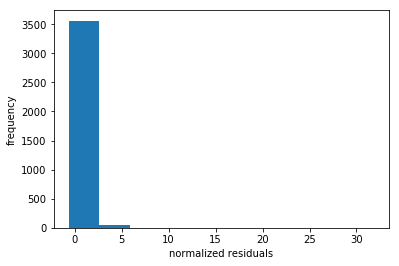

In [215]:
plt.hist(resid)
plt.ylabel('frequency')
plt.xlabel('normalized residuals');

#Model is poor when explaining low revenue because the larger the residual 

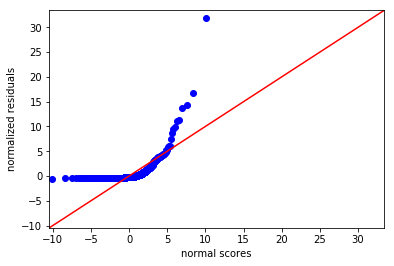

In [216]:
plot = sm.qqplot(resid, stats.t, distargs=(4,), loc=0, scale=1, line='45')
plt.ylabel('normalized residuals')
plt.xlabel('normal scores')
plt.show(plot)
#does a horrible job at explaining shops with low revenue and high revenue

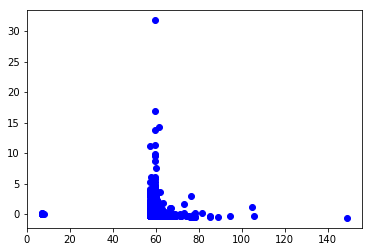

In [218]:
yhat = fitted.fittedvalues.values
plt.plot(yhat, resid, 'bo');
#testing homgenity of variance.
#Points aren't scattered equally below and above zero. 
#Clear dispersion for lower values closer to 60, and a closer 
#Something else is happening in the model that we failed to capture